In [24]:
import random
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from cation_problem.cation_net import predictions

matplotlib.use('TkAgg')

ModuleNotFoundError: No module named 'cation_problem.cation_net'

In [25]:
X_data_raw = pd.read_csv("../data/screening/OutputJoined.dat", delimiter="	")
Y_data = pd.read_csv("../data/screening/AdsorptionDataMOFsCrudeLowCH4298K.dat", delimiter="	")

In [26]:
X_data_raw

,Name,LCD,PLD,LCD_along_free_path,Density_g/cm^3,ASA_m^2/cm^3,ASA_m^2/g,NASA_m^2/cm^3:,NASA_m^2/g,Number_of_channels_N2,...,AV_Volume_fraction,AV_cm^3/g,NAV_Volume_fraction,NAV_cm^3/g,Number_of_channels_He,Number_of_pockets_He,POAV_Volume_fraction,POAV_cm^3/g,PONAV_Volume_fraction,PONAV_cm^3/g
0,ABAVIJ_clean,4.11811,1.95869,3.95454,1.524930,0.000,0.000,11.7846,89.2512,0,...,0.000,0.000000,0.013,0.008525,0,2,0.000,0.000000,0.073,0.047871
1,ABAYIO_clean,11.32496,4.29263,11.31958,0.949126,1201.710,1266.120,250.6950,130.6630,1,...,0.242,0.254971,0.000,0.000000,1,0,0.338,0.356117,0.000,0.000000
2,ABAYOU_clean,11.19896,4.48365,11.19896,0.979267,1239.530,1265.770,301.5870,159.3930,1,...,0.243,0.248145,0.000,0.000000,1,0,0.343,0.350262,0.000,0.000000
3,ABEFUL_clean,4.32934,2.84168,4.32757,1.551080,0.000,0.000,22.2963,95.7205,0,...,0.013,0.008381,0.000,0.000000,2,2,0.051,0.032880,0.000,0.000000
4,ABESUX_clean,6.14752,4.43426,6.13600,3.742910,1652.040,441.380,0.0000,0.0000,2,...,0.179,0.047824,0.000,0.000000,2,0,0.455,0.121563,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10138,ZUTBUN_clean,4.43680,3.87417,4.35221,2.282800,623.598,273.173,0.0000,0.0000,2,...,0.072,0.031540,0.000,0.000000,2,0,0.182,0.079727,0.000,0.000000
10139,ZUVTEP_clean,5.67693,3.23392,5.67693,1.639520,0.000,0.000,70.9171,519.4120,0,...,0.065,0.039646,0.000,0.000000,2,0,0.243,0.148214,0.000,0.000000
10140,ZUWXUM_clean,6.24052,5.46242,6.23949,0.917254,2302.930,2510.680,0.0000,0.0000,1,...,0.288,0.313981,0.000,0.000000,1,0,0.501,0.546195,0.000,0.000000
10141,ZUXPOZ_clean,4.83538,3.98138,4.83071,2.001620,702.473,350.953,0.0000,0.0000,2,...,0.077,0.038469,0.000,0.000000,2,0,0.300,0.149879,0.000,0.000000


In [27]:
Y_data

,StructureName,Selectivity_1e4_N2perHe,Selectivity_1e4_CH4perHe,Selectivity_1e4_CH4perN2,Selectivity_1e5_N2perHe,Selectivity_1e5_CH4perHe,Selectivity_1e5_CH4perN2,APS_N2perHe_[mol/kg],APS_CH4perHe_[mol/kg],R_N2perHe,R_CH4perHe,dN_N2_[mol/kg],dN_CH4_[mol/kg],Nmax_N2_[mol/kg],Nmax_CH4_[mol/kg]
0,ABAYIO_clean,4.756711,11.744966,2.469136,5.101423,12.512456,2.452738,0.240427,0.361333,0.901116,0.900455,0.047129,0.028878,0.052301,0.032070
1,ABAYOU_clean,5.905512,14.173228,2.400000,4.998252,12.255245,2.451906,0.229320,0.345514,0.895068,0.897290,0.045880,0.028193,0.051259,0.031420
2,ABESUX_clean,83.335991,62.006371,0.744053,79.606341,60.149967,0.755593,13.144777,1.879770,0.887965,0.889676,0.165122,0.031251,0.185956,0.035127
3,ABETAE_clean,77.911290,60.483871,0.776317,72.277398,56.966733,0.788168,11.362181,1.767817,0.891010,0.892649,0.157202,0.031032,0.176432,0.034764
4,ABETIN_clean,5.264946,11.929348,2.265806,5.514499,13.161599,2.386726,0.541069,0.774830,0.901085,0.906096,0.098118,0.058871,0.108888,0.064972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,ZUPBET_clean,42.419358,217.620984,5.130228,38.671236,197.941898,5.118582,4.671361,30.588557,0.888692,0.888439,0.120797,0.154533,0.135926,0.173938
5179,ZUTBUN_clean,405.512938,3335.617443,8.225675,258.681719,2207.721910,8.534511,106.097906,1954.580156,0.755760,0.764598,0.410148,0.885338,0.542697,1.157913
5180,ZUWXUM_clean,14.454509,46.425120,3.211809,13.679482,46.177689,3.375690,2.241807,6.422715,0.895429,0.900506,0.163881,0.139087,0.183020,0.154454
5181,ZUXPOZ_clean,26.540001,72.760003,2.741522,27.836833,75.419948,2.709358,2.192467,4.017958,0.895733,0.894496,0.078761,0.053274,0.087929,0.059558


In [28]:
X_data = X_data_raw[X_data_raw["Name"].isin(Y_data["StructureName"])]
X_data

,Name,LCD,PLD,LCD_along_free_path,Density_g/cm^3,ASA_m^2/cm^3,ASA_m^2/g,NASA_m^2/cm^3:,NASA_m^2/g,Number_of_channels_N2,...,AV_Volume_fraction,AV_cm^3/g,NAV_Volume_fraction,NAV_cm^3/g,Number_of_channels_He,Number_of_pockets_He,POAV_Volume_fraction,POAV_cm^3/g,PONAV_Volume_fraction,PONAV_cm^3/g
1,ABAYIO_clean,11.32496,4.29263,11.31958,0.949126,1201.710,1266.120,250.695,130.663,1,...,0.242,0.254971,0.0,0.0,1,0,0.338,0.356117,0.0,0.0
2,ABAYOU_clean,11.19896,4.48365,11.19896,0.979267,1239.530,1265.770,301.587,159.393,1,...,0.243,0.248145,0.0,0.0,1,0,0.343,0.350262,0.0,0.0
4,ABESUX_clean,6.14752,4.43426,6.13600,3.742910,1652.040,441.380,0.000,0.000,2,...,0.179,0.047824,0.0,0.0,2,0,0.455,0.121563,0.0,0.0
5,ABETAE_clean,6.10188,4.42988,6.10187,3.699280,1684.050,455.237,0.000,0.000,2,...,0.180,0.048658,0.0,0.0,2,0,0.457,0.123538,0.0,0.0
6,ABETIN_clean,9.40066,7.25998,9.39647,0.597233,2039.930,3415.630,0.000,0.000,1,...,0.333,0.557572,0.0,0.0,1,0,0.454,0.760173,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,ZUPBET_clean,4.76714,3.92393,4.76714,1.520770,718.649,472.556,0.000,0.000,1,...,0.072,0.047344,0.0,0.0,1,0,0.226,0.148609,0.0,0.0
10138,ZUTBUN_clean,4.43680,3.87417,4.35221,2.282800,623.598,273.173,0.000,0.000,2,...,0.072,0.031540,0.0,0.0,2,0,0.182,0.079727,0.0,0.0
10140,ZUWXUM_clean,6.24052,5.46242,6.23949,0.917254,2302.930,2510.680,0.000,0.000,1,...,0.288,0.313981,0.0,0.0,1,0,0.501,0.546195,0.0,0.0
10141,ZUXPOZ_clean,4.83538,3.98138,4.83071,2.001620,702.473,350.953,0.000,0.000,2,...,0.077,0.038469,0.0,0.0,2,0,0.300,0.149879,0.0,0.0


In [29]:
features = X_data.drop(columns=["Name"], axis=1)
labels = (Y_data["APS_CH4perHe_[mol/kg]"]).to_frame()#Y_data.drop(columns=["StructureName"], axis=1)
#labels["dN_CH4_[mol/kg]"] = Y_data["dN_CH4_[mol/kg]"]

In [30]:
######
features = features.drop(columns=["LCD_along_free_path", "ASA_m^2/g", "NASA_m^2/cm^3:", "NASA_m^2/g",
                                     "Number_of_channels_N2", "Number_of_pockets_N2", "NAV_Volume_fraction", "Number_of_channels_He",
                                     "Number_of_pockets_He","POAV_Volume_fraction", "POAV_cm^3/g", "PONAV_Volume_fraction",
                                     "PONAV_cm^3/g", "NAV_cm^3/g"], axis=1)

In [31]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(features_train, labels_train)
print(reg.score(features_test, labels_test))
reg_predictions = reg.predict(features_test)
labels_test[0:10], reg_predictions[0:10]

0.02585308558319821


(      APS_CH4perHe_[mol/kg]
 4754               8.217643
 5161               1.279260
 2027               0.813323
 405               11.690836
 2470              35.493228
 2058               0.341966
 601                1.198708
 4085               0.386459
 4531               1.296776
 376                1.072373,
 array([[ 17.25412395],
        [-30.59125092],
        [ -7.87555561],
        [ 28.77255582],
        [ 65.24823281],
        [-15.18123838],
        [-47.6222809 ],
        [ 60.14292509],
        [ 23.15685748],
        [-59.34839791]]))

In [33]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
clf = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=10000, tol=1e-3, random_state=42))
clf.fit(features_train, labels_train)
clf.score(features_train, labels_train)

C:\Users\anton\PycharmProjects\isotherm\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.019890452487405397

In [34]:
clf_predictions = clf.predict(features_test)
mae = mean_absolute_error(labels_test, clf_predictions)
print(mae)
labels_test[0:15], clf_predictions[0:15]

64.46310100145136


(      APS_CH4perHe_[mol/kg]
 4754               8.217643
 5161               1.279260
 2027               0.813323
 405               11.690836
 2470              35.493228
 2058               0.341966
 601                1.198708
 4085               0.386459
 4531               1.296776
 376                1.072373
 3001               0.924179
 3388              20.810561
 42                 0.146675
 2996               0.968028
 3022               8.536075,
 array([ 18.34110816, -28.25952974,  -2.70857995,  27.83100363,
         62.37580527,  -3.23587356, -42.21100241,  60.65779272,
         25.30325525, -47.06186234,  42.75811291, -22.8093345 ,
        -20.9328741 , 165.41002717,  29.53210518]))

In [35]:
def calc_APS(label):
    return label[0] * label[1]

def calc_APS_for_array(array):
    APS_list = []
    for i in range(len(array)):
        APS_list.append(array[i][0] * array[i][1])
    return APS_list

In [36]:
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=30, min_samples_split=2, min_samples_leaf=1)
rf.fit(features_train, labels_train.to_numpy())
rf.score(features_train, labels_train.to_numpy())

C:\Users\anton\AppData\Local\Temp\ipykernel_11784\4108975030.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(features_train, labels_train.to_numpy())


0.9497646694140653

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Grid Search с кросс-валидацией
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(features_train, labels_train.to_numpy())
# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 

In [39]:
rf_predictions = rf.predict(features_test)

mae = mean_absolute_error(labels_test, rf_predictions)
print(mae)
for i in range(30):
    print((labels_test.to_numpy()[i]), (rf_predictions[i]))

20.121539774601338
[8.21764329] 11.764117974569476
[1.27925973] 0.7110422454384364
[0.81332279] 0.8517116760931894
[11.69083631] 12.101695231539818
[35.49322798] 12.257646103782205
[0.34196611] 0.4457782124228149
[1.19870833] 1.51037585147116
[0.38645912] 11.60368499102842
[1.29677648] 1.4707341385221753
[1.07237287] 0.9205209979059019
[0.92417939] 10.990704659424411
[20.81056122] 6.125038078435928
[0.1466747] 0.3428759269576478
[0.96802779] 44.51160882803037
[8.53607525] 12.902540219946966
[0.9929313] 1.0933147931596958
[10.1930766] 14.868661184015213
[0.47426564] 2.0537407420931113
[1.46783579] 9.351131976205593
[1.12044166] 16.190442244475136
[0.43559061] 3.071340976397746
[6.54203488] 2.729800547475646
[2.32598204] 1.0905359688042877
[3.74047798] 14.50594636766556
[40.45008575] 26.305844174095736
[2.60944678] 27.78374118301161
[9.13672169] 18.81098606458712
[0.55785518] 1.9105759062784982
[6.45169329] 5.360027786079141
[5.34257301] 28.244512375860726


OSError: 'seaborn-v0_8-darkgrid' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

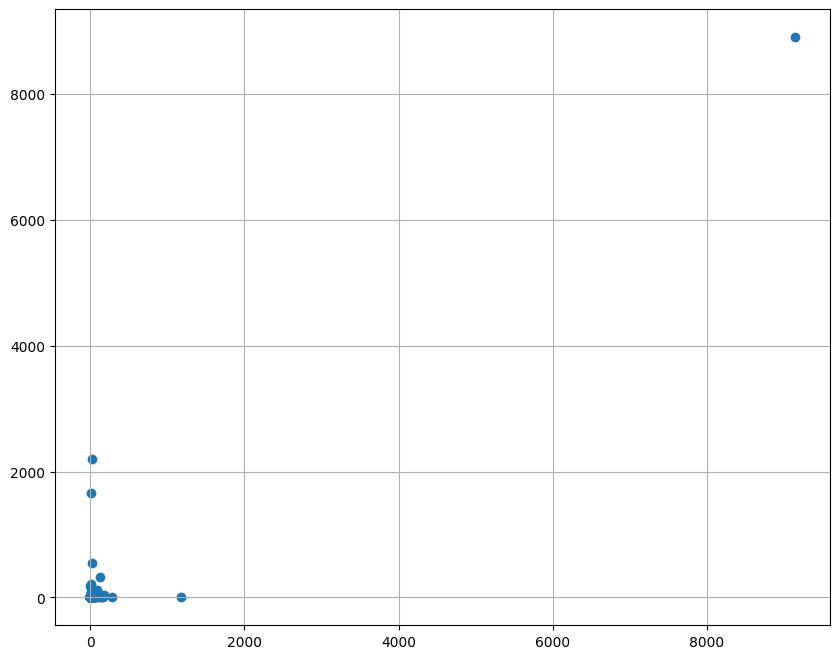

In [40]:
plt.figure(figsize=(10, 8))
plt.scatter((rf_predictions), (labels_test.to_numpy()))
plt.grid()
plt.style.use('seaborn-v0_8-darkgrid')
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Real APS CH4/He [mol/kg]", fontsize=14)
plt.xlabel("Predicted APS CH4/He [mol/kg]", fontsize=14)

plt.plot([0, 20000], [0, 20000], color='red', linestyle='-', linewidth=1)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
from sklearn.inspection import permutation_importance
import seaborn as sns
perm_importance = permutation_importance(rf, features_train, labels_train, n_repeats=30, random_state=42)

# Преобразуем данные в удобный формат
feature_importances = pd.DataFrame(
    perm_importance.importances,
    index= ['LCD', 'PLD', 'Density', 'ASA', 'VF', 'AV']
).T


sorted_features = feature_importances.median().sort_values(ascending=True)
sorted_importances = feature_importances[sorted_features.index]
# Построение boxplot
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 8))

# Построение boxplot с цветовой дифференциацией
colors = sns.color_palette("coolwarm", len(sorted_features))
box = plt.boxplot(
    sorted_importances,
    vert=False,
    patch_artist=True,
    labels=sorted_features.index,
    showfliers=False
)

# Добавление цветов к ящикам
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# Настройка логарифмической шкалы
plt.xscale('log')
plt.xlabel("Decrease in accuracy (mae) [mol/kg]", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance", fontsize=14)

# Улучшение отображения
plt.tight_layout()
plt.show()

OSError: 'seaborn-v0_8-darkgrid' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [42]:
importance_df = pd.DataFrame({
    "Feature": features_train.columns,
    "Mean": perm_importance.importances_mean,
    "STD": perm_importance.importances_std
}).sort_values(by="Mean", ascending=False)
importance_df

,Feature,Mean,STD
0,LCD,1.319231,0.032803
3,ASA_m^2/cm^3,0.076453,0.003571
2,Density_g/cm^3,0.071708,0.007931
1,PLD,0.043215,0.003903
4,AV_Volume_fraction,0.035870,0.002837
5,AV_cm^3/g,0.031639,0.002348


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=20, random_state=42)
gbr.fit(features_train, labels_train.to_numpy().flatten())
gbr.score(features_train, labels_train.to_numpy().flatten())

0.9999999999970656

In [44]:
gbr_predictions = gbr.predict(features_test)
mae = mean_absolute_error(labels_test, gbr_predictions)
print(mae)
for i in range(10):
    print(labels_test.to_numpy()[i], gbr_predictions[i])

21.922417514242
[8.21764329] 11.286021560765821
[1.27925973] 0.6625315316553455
[0.81332279] 1.1699467366075302
[11.69083631] 13.484699695117168
[35.49322798] 13.835695947008636
[0.34196611] 0.923950516751962
[1.19870833] 1.909656766018169
[0.38645912] 16.497478229842706
[1.29677648] 2.5149939271595456
[1.07237287] 1.19175620293053


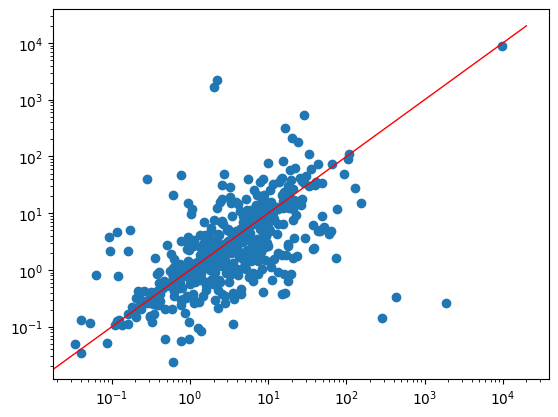

In [45]:
plt.scatter(gbr_predictions, labels_test.to_numpy())
plt.yscale('log')
plt.xscale('log')
plt.plot([0, 20000], [0, 20000], color='red', linestyle='-', linewidth=1)
plt.show()

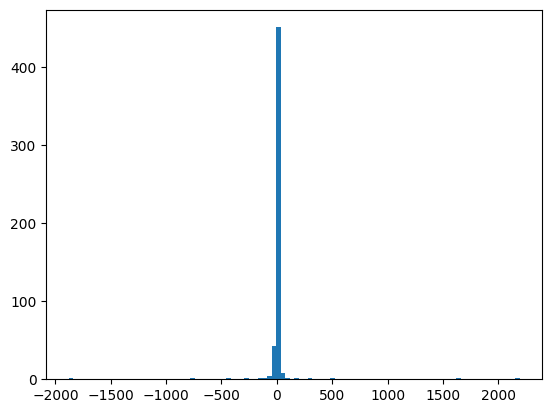

In [46]:
plt.hist((labels_test.to_numpy().flatten()- gbr_predictions), bins=100)
plt.show()

In [47]:
# Перемешивание признаков
perm_importance = permutation_importance(gbr, features_test, labels_test, n_repeats=100, random_state=42)

# Вывод результатов
perm_df = pd.DataFrame({
    'Feature': features_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_df)

              Feature  Importance
0                 LCD    0.902577
5           AV_cm^3/g    0.110692
2      Density_g/cm^3    0.091163
4  AV_Volume_fraction    0.028035
3        ASA_m^2/cm^3    0.009119
1                 PLD   -0.003778


In [48]:
for i in range(0, 10):
    print(labels_test.to_numpy().flatten()[i], gbr_predictions[i])

8.217643291451639 11.286021560765821
1.2792597334974856 0.6625315316553455
0.8133227866127891 1.1699467366075302
11.690836308084933 13.484699695117168
35.493227978313755 13.835695947008636
0.3419661123786092 0.923950516751962
1.198708326169342 1.909656766018169
0.386459124385256 16.497478229842706
1.2967764806103377 2.5149939271595456
1.0723728732891122 1.19175620293053


In [49]:
from cation_problem.corr_plot import corr_heatmap_with_pval
df_for_plot = features.drop(columns=["LCD_along_free_path", "ASA_m^2/g", "NASA_m^2/cm^3:", "NASA_m^2/g",
                                     "Number_of_channels_N2", "Number_of_pockets_N2", "AV_cm^3/g", "NAV_Volume_fraction", "Number_of_channels_He",
                                     "Number_of_pockets_He","POAV_Volume_fraction", "POAV_cm^3/g", "PONAV_Volume_fraction",
                                     "PONAV_cm^3/g", "NAV_cm^3/g"], axis=1)

df_for_plot["APS_N2"] = Y_data["APS_N2perHe_[mol/kg]"]
df_for_plot["APS_CH4"] = Y_data["APS_CH4perHe_[mol/kg]"]





df_for_plot["Selectivity_1e4_CH4perHe"] = Y_data["Selectivity_1e4_CH4perHe"]
df_for_plot["dN_CH4_[mol/kg]"] = Y_data["dN_CH4_[mol/kg]"]

KeyError: "['LCD_along_free_path', 'ASA_m^2/g', 'NASA_m^2/cm^3:', 'NASA_m^2/g', 'Number_of_channels_N2', 'Number_of_pockets_N2', 'NAV_Volume_fraction', 'Number_of_channels_He', 'Number_of_pockets_He', 'POAV_Volume_fraction', 'POAV_cm^3/g', 'PONAV_Volume_fraction', 'PONAV_cm^3/g', 'NAV_cm^3/g'] not found in axis"

In [52]:
%matplotlib qt
corr_heatmap_with_pval(features)

In [288]:
from pytorch_tabnet.tab_model import TabNetRegressor
reg = TabNetRegressor(n_d=8, n_a=8, n_steps=5, gamma=1.5, seed=42)
reg.fit(features_train.to_numpy(), labels_train.to_numpy(), eval_set=[(features_test.to_numpy(), labels_test.to_numpy())], eval_metric=['mae'], max_epochs=100, patience=100, batch_size=128)


C:\Users\ivano\PycharmProjects\isotherm\venv10\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 150760.92661| val_0_mae: 36.56007|  0:00:01s
epoch 1  | loss: 150407.54977| val_0_mae: 33.3536 |  0:00:02s
epoch 2  | loss: 150705.88524| val_0_mae: 33.09231|  0:00:03s
epoch 3  | loss: 150252.83783| val_0_mae: 32.75675|  0:00:03s
epoch 4  | loss: 150328.85949| val_0_mae: 33.01171|  0:00:04s
epoch 5  | loss: 133835.67337| val_0_mae: 32.82792|  0:00:05s
epoch 6  | loss: 150565.99588| val_0_mae: 32.87185|  0:00:06s
epoch 7  | loss: 150172.10663| val_0_mae: 33.09029|  0:00:07s
epoch 8  | loss: 148908.77538| val_0_mae: 33.57794|  0:00:08s
epoch 9  | loss: 132851.24902| val_0_mae: 33.83336|  0:00:09s
epoch 10 | loss: 149904.19996| val_0_mae: 37.89112|  0:00:10s
epoch 11 | loss: 148078.9429| val_0_mae: 32.9121 |  0:00:11s
epoch 12 | loss: 148901.28763| val_0_mae: 33.29315|  0:00:12s
epoch 13 | loss: 149221.4719| val_0_mae: 33.4352 |  0:00:13s
epoch 14 | loss: 148257.14109| val_0_mae: 35.31007|  0:00:14s
epoch 15 | loss: 147442.98703| val_0_mae: 33.54367|  0:00:14s
epoch 16 |

C:\Users\ivano\PycharmProjects\isotherm\venv10\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [207]:
y_pred = reg.predict(features_test.to_numpy())
for i in range(0, 15):
    print((labels_test.to_numpy()[i]), (y_pred[i]))
mae = mean_absolute_error((labels_test.to_numpy()), (y_pred))
print(mae)

[8.21764329] [4.258762]
[1.27925973] [-1.569135]
[0.81332279] [-1.6329708]
[11.69083631] [7.649029]
[35.49322798] [11.191654]
[0.34196611] [-1.2008679]
[1.19870833] [-1.0093303]
[0.38645912] [12.033406]
[1.29677648] [1.9844788]
[1.07237287] [-0.8253348]
[0.92417939] [12.374022]
[20.81056122] [2.953802]
[0.1466747] [-0.90244627]
[0.96802779] [25.63765]
[8.53607525] [12.499138]
33.27296532620909


In [208]:
plt.scatter((y_pred), (labels_test.to_numpy()))
plt.yscale('log')
plt.xscale('log')
plt.plot([0, 100], [0, 100], color='red', linestyle='-', linewidth=2)
plt.show()

In [287]:
# Перемешивание признаков
perm_importance = permutation_importance(reg, features_test.to_numpy(), labels_test, n_repeats=100, random_state=42, scoring="neg_mean_absolute_error")

# Вывод результатов
perm_df = pd.DataFrame({
    'Feature': features_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_df)

              Feature  Importance
4  AV_Volume_fraction    1.103612
0                 LCD    0.356236
2      Density_g/cm^3    0.183675
5           AV_cm^3/g    0.065387
1                 PLD   -0.001118
3        ASA_m^2/cm^3   -0.067404


In [311]:
from sklearn.neural_network import MLPRegressor
regr_net = MLPRegressor(random_state=42, max_iter=3000, hidden_layer_sizes=(100, 100),
                        verbose=True, learning_rate="adaptive", n_iter_no_change=100, activation="relu", warm_start=True).fit(features_train, labels_train)
regr_net.score(labels_train, features_train)

C:\Users\ivano\PycharmProjects\isotherm\venv10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 75830.31991953
Iteration 2, loss = 75235.95537668
Iteration 3, loss = 75221.89708490
Iteration 4, loss = 75220.84969841
Iteration 5, loss = 75225.86874820
Iteration 6, loss = 75263.11355663
Iteration 7, loss = 75221.94521262
Iteration 8, loss = 75175.72832056
Iteration 9, loss = 75195.38945077
Iteration 10, loss = 75180.44918640
Iteration 11, loss = 75218.52247618
Iteration 12, loss = 75124.16509897
Iteration 13, loss = 75179.36167205
Iteration 14, loss = 75093.57600642
Iteration 15, loss = 75096.86525641
Iteration 16, loss = 75040.24072136
Iteration 17, loss = 75020.34146465
Iteration 18, loss = 75025.31063921
Iteration 19, loss = 75026.22301678
Iteration 20, loss = 75030.34751054
Iteration 21, loss = 75015.32017476
Iteration 22, loss = 74921.76896065
Iteration 23, loss = 74930.77178339
Iteration 24, loss = 74890.01085263
Iteration 25, loss = 74875.70687264
Iteration 26, loss = 74830.23329631
Iteration 27, loss = 74817.81531086
Iteration 28, loss = 74782.64164701
I

C:\Users\ivano\PycharmProjects\isotherm\venv10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- APS_CH4perHe_[mol/kg]
Feature names seen at fit time, yet now missing:
- ASA_m^2/cm^3
- AV_Volume_fraction
- AV_cm^3/g
- Density_g/cm^3
- LCD
- ...


In [310]:
net_pred = regr_net.predict(features_test)
for i in range(0, 15):
    print((labels_test.to_numpy()[i]), (net_pred[i]))
mae = mean_absolute_error((labels_test.to_numpy()), (net_pred))
print(mae)

[8.21764329] 4.099726923414018
[1.27925973] 4.099726923414018
[0.81332279] 4.099726923414018
[11.69083631] 4.099726923414018
[35.49322798] 17.382719802578514
[0.34196611] 4.099726923414018
[1.19870833] 4.099726923414018
[0.38645912] 8.031670133179187
[1.29677648] 4.099726923414018
[1.07237287] -0.30905103076273743
[0.92417939] 4.099726923414018
[20.81056122] 4.099726923414018
[0.1466747] 4.099726923414018
[0.96802779] 292.7054945349885
[8.53607525] 4.099726923414018
48.37300475570421


In [ ]:
# Перемешивание признаков
perm_importance = permutation_importance(reg, features_test.to_numpy(), labels_test, n_repeats=100, random_state=42, scoring="neg_mean_absolute_error")

# Вывод результатов
perm_df = pd.DataFrame({
    'Feature': features_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_df)